# Statistics

The study of collecting, organizing, analyzing, interpreting, and presenting data.

## Why is statistics important

Statistics help us make sense of the data in our world to draw conclusions about life in all aspects. 


### Descriptive vs. Inferential Statistics
#### Descriptive Statistics
Summarises and describes a corpora of data (averages, standard deviations, meadians, etc.)

### Inferential Statistics
Makes predictions or inferences about the data (classification, drug effectiveness)

## Variables
A variable is any characteristic, number, or quantity that can be measured or counted and that can change from one individual or observation to another.

<img src="Variable_types_mindmap.png" style="width:60%;height:auto;display:block;margin:auto;width:50%;">

## Types of Variables
### Qualitative (Categorical)
Nominal: categories do not have a hierarchy or order (eye color, gender, brand names) <br>
Ordinal: they have an order attached to them (satisfaction level, education level)

### Quantitative (Numerical)
Discrete: Non-divisible numbers (number of people in your family, number of cars in quito, number of prime numbers) <br>
Continuous: Divisible numbers (height, weight, time passed, money)

## Populations vs Samples
### Population
The entire cohort to study or to whom the problem is concerned with (the entire weeb population in the world)

### Samples 
A subset of the population, taken for simplicity's sake or because taking the entire population data is impossible. 
Sampling methods are usually used to ensure that the sample selected is not biased. 
biased: because of the sampling method the sample's properties, intertests, features are different from the population.



## Frequency Distributions

A frequency distribution is a summary of how often different values occur in a dataset. It helps organize data for easy interpretation and visualization.

In [121]:
import pandas as pd
import numpy as np

# Create a list of 100 colored balls
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']
balls = np.random.choice(colors, size=20, p=[0.3, 0.25, 0.2, 0.15, 0.1])
print(balls)

# Create a DataFrame
df_balls = pd.DataFrame({'Color': balls})

# Generate frequency table
freq_table = df_balls['Color'].value_counts().reset_index()
freq_table.columns = ['Color', 'Frequency']
freq_table['Relative Frequency'] = freq_table['Frequency'] / len(df_balls)

print("Frequency Distribution Table:")
print(freq_table)

['Green' 'Purple' 'Blue' 'Green' 'Purple' 'Red' 'Blue' 'Blue' 'Green'
 'Blue' 'Blue' 'Purple' 'Green' 'Red' 'Green' 'Blue' 'Green' 'Blue' 'Blue'
 'Blue']
Frequency Distribution Table:
    Color  Frequency  Relative Frequency
0    Blue          9                0.45
1   Green          6                0.30
2  Purple          3                0.15
3     Red          2                0.10


In [122]:
# Create a new list of 20 colored balls with different probabilities
new_balls = np.random.choice(colors, size=20, p=[0.2, 0.3, 0.1, 0.25, 0.15])

# Create a new DataFrame
df_new_balls = pd.DataFrame({'Color': new_balls})

# Generate a new frequency table
new_freq_table = df_new_balls['Color'].value_counts().reset_index()
new_freq_table.columns = ['Color', 'Frequency']
new_freq_table['Relative Frequency'] = new_freq_table['Frequency'] / len(df_new_balls)

print("New Frequency Distribution Table:")
print(new_freq_table)

New Frequency Distribution Table:
    Color  Frequency  Relative Frequency
0    Blue          8                0.40
1  Yellow          5                0.25
2     Red          4                0.20
3   Green          3                0.15


In [123]:
# Generate a sample of 100 values
sample = np.random.normal(loc=40, scale=5, size=100)
print(sample)

# Create bins for age ranges with 5-year intervals
bins = np.arange(0, 101, 5)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Create a frequency table for the age ranges
age_range_freq_table = pd.cut(sample, bins=bins, labels=labels, right=False).value_counts().sort_index().reset_index()
age_range_freq_table.columns = ['Age Range', 'Frequency']

print("Frequency Table of Age Ranges (5 years):")
print(age_range_freq_table)

[35.8555111  48.48320398 33.23922518 36.67194021 47.5710924  38.23469556
 34.79110082 34.86893405 35.39860793 40.7589931  47.70210569 43.04679169
 37.48814176 36.12669674 32.00317652 50.69334681 41.16151057 48.30343643
 41.34177437 43.42482613 39.94243679 36.61614935 38.36109847 35.07200987
 35.29710636 41.05923484 41.98408014 42.08422649 35.24643832 31.93575664
 48.0661279  44.62465142 39.43958021 36.66926477 41.37376782 43.95657134
 42.47383048 38.93570606 56.7733443  35.3644196  35.46982998 41.81960777
 40.77735168 41.24039992 45.76917326 32.28672499 41.86726161 47.6129786
 41.71330469 50.01051272 41.71857254 40.13661978 36.90200285 35.97154733
 41.22236838 36.02272973 43.89710627 36.93986902 36.88140007 44.93582874
 38.74173235 36.12234514 43.70433738 38.45407435 43.43777881 35.41720835
 39.57044728 38.64925544 40.32175216 37.17593126 35.49184253 36.01125041
 36.67589705 42.93466268 44.57386678 43.64933665 37.23656045 40.0823026
 31.74029995 34.74738672 32.06334143 37.8007199  43.1

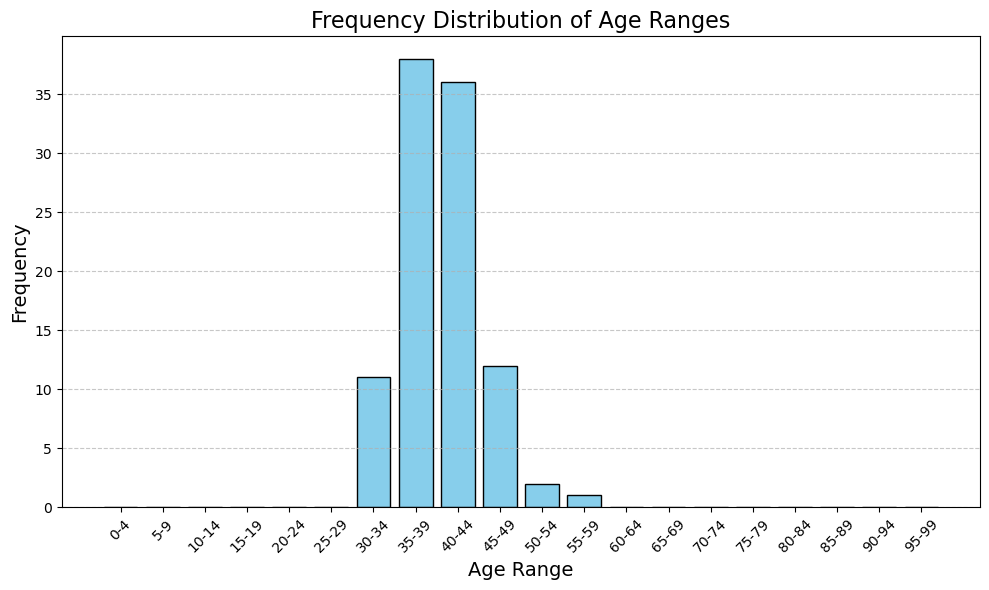

In [124]:
import matplotlib.pyplot as plt

# Bar plot for age range frequency
plt.figure(figsize=(10, 6))
plt.bar(age_range_freq_table['Age Range'], age_range_freq_table['Frequency'], color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Age Ranges', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [125]:
from scipy.stats import norm

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(sample, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))

# Overlay the normal distribution
mean, std = norm.fit(sample)
x = np.linspace(min(sample), max(sample), 1000)
pdf = norm.pdf(x, mean, std)
pdf_scaled = pdf * len(sample) * 0.1  # Scale the PDF to match the boxplot scale

plt.plot(x, pdf_scaled, color='red', label='Normal Distribution')
plt.title('Boxplot with Superposed Normal Distribution', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'scipy'

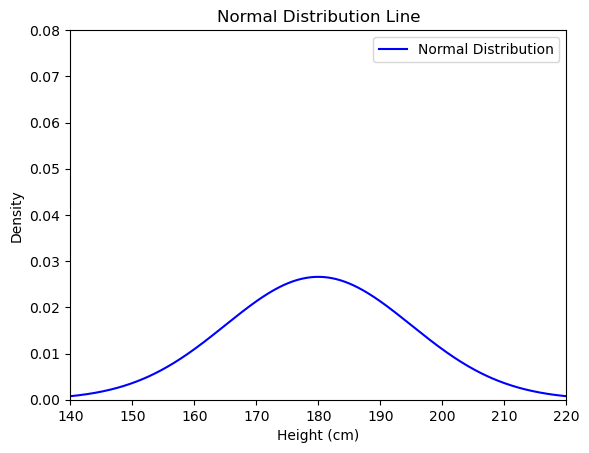

In [ ]:
#the normal distribution 
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution (based on US data)
mean_height = 180 #mean height in cm
std_dev_height = 15  # Standard deviation in cm

# Generate x values for the normal distribution
x = np.linspace(mean_height - 4*std_dev_height, mean_height + 4*std_dev_height, 1000)

# Calculate the PDF for the normal distribution
pdf = norm.pdf(x, mean_height, std_dev_height)

#setting the scale
plt.xlim(140, 220)
plt.ylim(0, 0.08)
# Plot the normal distribution line
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.title("Normal Distribution Line")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()


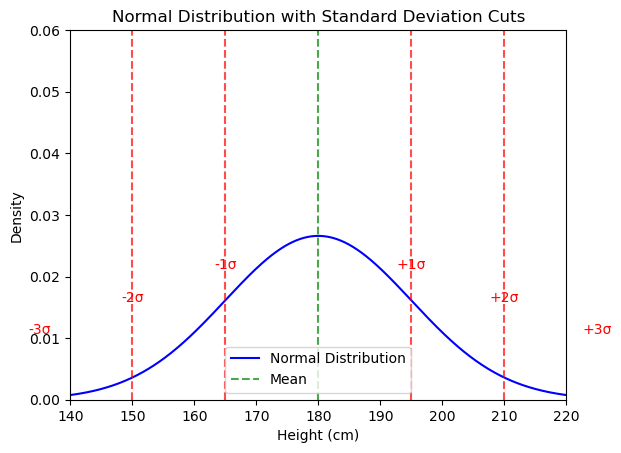

In [ ]:
# Plot the normal distribution line
plt.plot(x, pdf, label='Normal Distribution', color='blue')

# Add vertical lines for standard deviation cuts
mean_height = 180  # Mean height in cm
std_cuts = [mean_height - std_dev_height, mean_height + std_dev_height,
            mean_height - 2*std_dev_height, mean_height + 2*std_dev_height,
            mean_height - 3*std_dev_height, mean_height + 3*std_dev_height]

plt.axvline(mean_height, color='green', linestyle='--', label='Mean', alpha=0.7)
for cut in std_cuts:
    plt.axvline(cut, color='red', linestyle='--', alpha=0.7)

plt.xlim(140, 220)
plt.ylim(0, 0.06)
# Add labels for the standard deviation cuts
plt.text(mean_height - std_dev_height, max(pdf)*0.8, '-1σ', color='red', horizontalalignment='center')
plt.text(mean_height + std_dev_height, max(pdf)*0.8, '+1σ', color='red', horizontalalignment='center')
plt.text(mean_height - 2*std_dev_height, max(pdf)*0.6, '-2σ', color='red', horizontalalignment='center')
plt.text(mean_height + 2*std_dev_height, max(pdf)*0.6, '+2σ', color='red', horizontalalignment='center')
plt.text(mean_height - 3*std_dev_height, max(pdf)*0.4, '-3σ', color='red', horizontalalignment='center')
plt.text(mean_height + 3*std_dev_height, max(pdf)*0.4, '+3σ', color='red', horizontalalignment='center')

# Add title and labels
plt.title("Normal Distribution with Standard Deviation Cuts")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

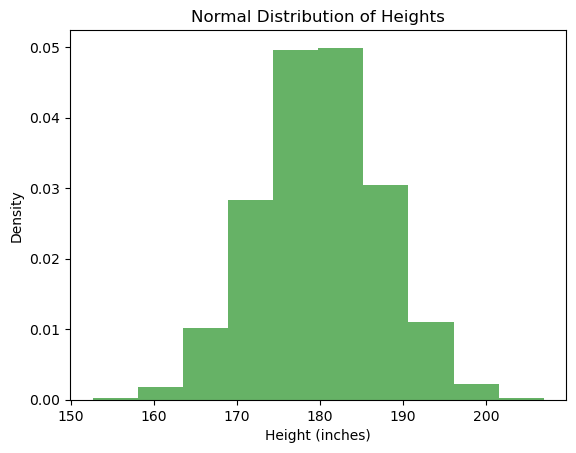

In [ ]:
# Parameters for the normal distribution (based on US data)
mean_height = 180 #mean height in cm
std_dev_height = 7.5  # Standard deviation in cm

# Generate a normal distribution
heights = np.random.normal(mean_height, std_dev_height, 10000)

# Plot the distribution
plt.hist(heights, bins=10, density=True, alpha=0.6, color='g')
plt.title("Normal Distribution of Heights")
plt.xlabel("Height (inches)")
plt.ylabel("Density")
plt.show()

Mean Salary: 65590.28
Median Salary: 65611.59
Standard Deviation: 24745.26


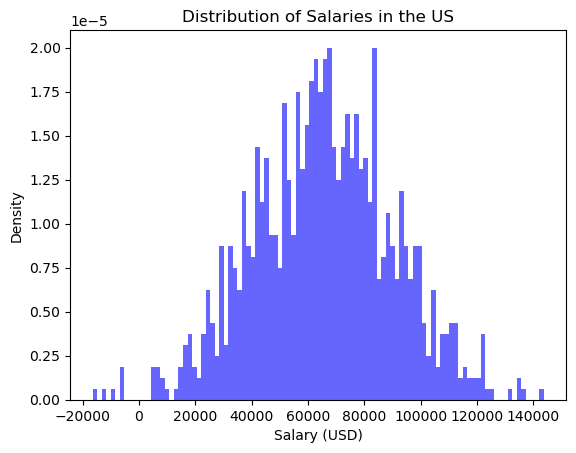

In [ ]:
#asuming `salaries` is a numpy array or pandas Series containing salary data
salaries = np.random.normal(66000, 25000, 1000)  # Example: Generate synthetic salary data

#salaries= np.append(salaries, 1000000)
#print summary statistics
mean = np.mean(salaries)
median = np.median(salaries)
std_dev = np.std(salaries)
print(f"Mean Salary: {mean:.2f}")
print(f"Median Salary: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Plot the distribution
plt.hist(salaries, bins=100, density=True, alpha=0.6, color='blue')
plt.title("Distribution of Salaries in the US")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.show()

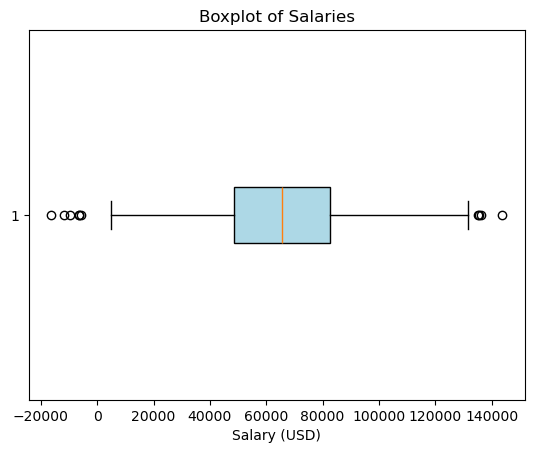

In [ ]:
plt.boxplot(salaries, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Salaries")
plt.xlabel("Salary (USD)")
plt.show()